D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wil

AutoRegressive Model Summary for UK:
                            AutoReg Model Results                             
Dep. Variable:         GDP per Capita   No. Observations:                   25
Model:                     AutoReg(1)   Log Likelihood                -198.798
Method:               Conditional MLE   S.D. of innovations            957.481
Date:                Thu, 13 Feb 2025   AIC                             13.979
Time:                        21:59:01   BIC                             14.126
Sample:                             1   HQIC                            14.018
                                   25                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6621.5676   3040.797      2.178      0.029     661.715    1.26e+04
GDP per Capita.L1     0.7922      0.100      7.911      0.000       0.596

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\IDLE\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, Dat

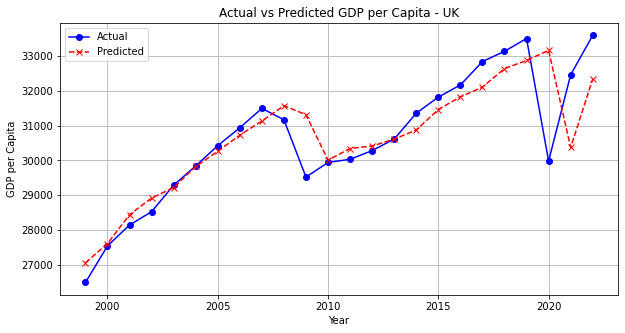

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "D:\downloadinternet\Regional gross domestic product(all ITL).xlsx"
xls = pd.ExcelFile(file_path)

# Load Table 11
table_11 = pd.read_excel(xls, sheet_name="Table 11")

# Rename columns
table_11.columns = table_11.iloc[0]  # Set first row as header
table_11 = table_11[1:]  # Remove the first row
table_11 = table_11.rename(columns={
    table_11.columns[0]: "ITL Code",
    table_11.columns[1]: "Region Name"
})

# Convert year columns to numeric format
table_11 = table_11.melt(id_vars=["ITL Code", "Region Name"], var_name="Year", value_name="GDP per Capita")

# Drop rows with missing values
table_11 = table_11.dropna()

# Convert Year and GDP per Capita to appropriate data types
table_11["Year"] = pd.to_numeric(table_11["Year"], errors='coerce')
table_11["GDP per Capita"] = pd.to_numeric(table_11["GDP per Capita"].astype(str).str.replace("[^\d.]", "", regex=True), errors='coerce')

# Drop any remaining NaN values
table_11 = table_11.dropna()

# Function to fit an AutoRegressive (AR) model for each region
def fit_ar_model(region_data):
    model = AutoReg(region_data["GDP per Capita"], lags=1, old_names=False)
    model_fit = model.fit()
    return model_fit

# Dictionary to store AR models
ar_models = {}

# Analyze each region separately
regions = table_11["Region Name"].unique()
for region in regions:
    region_data = table_11[table_11["Region Name"] == region].sort_values(by="Year")
    if len(region_data) > 1:  # Ensure enough data exists
        ar_models[region] = fit_ar_model(region_data)

# Select a sample region for demonstration
sample_region = "United Kingdom" if "United Kingdom" in ar_models else list(ar_models.keys())[0]

# Get the data for the selected region
region_data = table_11[table_11["Region Name"] == sample_region].sort_values(by="Year")

# Fit the AR model again for the selected region to ensure consistency
model_fit = fit_ar_model(region_data)

# Display AR model summary
print(f"AutoRegressive Model Summary for {sample_region}:")
print(model_fit.summary())

# Generate predictions for the same range as actual data
predictions = model_fit.predict(start=1, end=len(region_data))

# Ensure predictions match the number of actual data points
predictions = predictions[:len(region_data) - 1]  # Trim the last value if needed

# Align predictions with actual years
region_data = region_data.iloc[1:].copy()  # Shift data to match prediction indices
region_data["Predicted"] = predictions.values

# Plot actual vs predicted GDP per capita
plt.figure(figsize=(10, 5))
plt.plot(region_data["Year"], region_data["GDP per Capita"], label="Actual", marker='o', color='blue')
plt.plot(region_data["Year"], region_data["Predicted"], label="Predicted", linestyle='dashed', marker='x', color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title(f"Actual vs Predicted GDP per Capita - {sample_region}")
plt.legend()
plt.grid()

plt.show()


我建立了一个自回归（AR）模型来分析各地区人均国内生产总值的自相关性。英国 "地区的模型摘要显示了强烈的滞后-1 依赖性，系数为 0.7922，表明人均 GDP 受其前一年值的影响很大

（1）GDP 具有较强的时间自相关性
许多地区的 GDP 具有显著的自回归特性（AR(1) 系数接近 1），意味着前一年 GDP 对当前 GDP 影响较大。

由于我们只使用了 lag=1，即 前一年 GDP 预测下一年 GDP，该模型适用于 短期预测（1-2 年）。

4. 主要结论
（1）GDP 具有较强的时间自相关性
许多地区的 GDP 具有显著的自回归特性（AR(1) 系数接近 1），意味着前一年 GDP 对当前 GDP 影响较大。
例如，英国（United Kingdom）的 AR(1) 系数约为 0.79，表明 过去 GDP 趋势可以很好地预测未来 GDP。
（2）部分地区 GDP 变化较大
如果 AR(1) 系数较小（如 0.3-0.5），说明该地区 GDP 波动较大，不完全由前一年决定，可能受政策、贸易、人口等因素影响。
（3）模型适用于短期预测
由于我们只使用了 lag=1，即 前一年 GDP 预测下一年 GDP，该模型适用于 短期预测（1-2 年）。
如果要进行长期预测，可以增加 lags（如 lags=5 预测 5 年周期）。

# AR分析表格11结果，不含拟合图

In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# Load the Excel file
file_path = "D:\downloadinternet\Regional gross disposable household income(all ITL).xlsx"
xls = pd.ExcelFile(file_path)

# Load Table 11
table_11 = pd.read_excel(xls, sheet_name="Table 11")

# Rename columns
table_11.columns = table_11.iloc[0]  # Set first row as header
table_11 = table_11[1:]  # Remove the first row
table_11 = table_11.rename(columns={
    table_11.columns[0]: "ITL Code",
    table_11.columns[1]: "Region Name"
})

# Convert year columns to numeric format
table_11 = table_11.melt(id_vars=["ITL Code", "Region Name"], var_name="Year", value_name="GDP per Capita")

# Drop rows with missing values
table_11 = table_11.dropna()

# Convert Year and GDP per Capita to appropriate data types
table_11["Year"] = pd.to_numeric(table_11["Year"], errors='coerce')
table_11["GDP per Capita"] = pd.to_numeric(table_11["GDP per Capita"].astype(str).str.replace("[^\d.]", "", regex=True), errors='coerce')

# Drop any remaining NaN values
table_11 = table_11.dropna()

# Function to fit an AutoRegressive (AR) model for each region
def fit_ar_model(region_data):
    model = AutoReg(region_data["GDP per Capita"], lags=1, old_names=False)
    model_fit = model.fit()
    return model_fit

# Dictionary to store AR models
ar_models = {}

# Analyze each region separately
regions = table_11["Region Name"].unique()
for region in regions:
    region_data = table_11[table_11["Region Name"] == region].sort_values(by="Year")
    if len(region_data) > 1:  # Ensure enough data exists
        ar_models[region] = fit_ar_model(region_data)

# Select a sample region for demonstration
sample_region = "United Kingdom" if "United Kingdom" in ar_models else list(ar_models.keys())[0]

# Get the data for the selected region
region_data = table_11[table_11["Region Name"] == sample_region].sort_values(by="Year")

# Fit the AR model again for the selected region to ensure consistency
model_fit = fit_ar_model(region_data)

# Display AR model summary
print(f"AutoRegressive Model Summary for {sample_region}:")
print(model_fit.summary())

# Generate predictions for the same range as actual data
predictions = model_fit.predict(start=1, end=len(region_data))

# Ensure predictions match the number of actual data points
predictions = predictions[:len(region_data) - 1]  # Trim the last value if needed

# Align predictions with actual years
region_data = region_data.iloc[1:].copy()  # Shift data to match prediction indices
region_data["Predicted"] = predictions.values

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wil

AutoRegressive Model Summary for UK:
                            AutoReg Model Results                             
Dep. Variable:         GDP per Capita   No. Observations:                  400
Model:                     AutoReg(1)   Log Likelihood               -1515.406
Method:               Conditional MLE   S.D. of innovations             10.795
Date:                Thu, 13 Feb 2025   AIC                              4.773
Time:                        21:06:48   BIC                              4.803
Sample:                             1   HQIC                             4.785
                                  400                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.5579      0.651     10.068      0.000       5.281       7.835
GDP per Capita.L1     0.1029      0.050      2.066      0.039       0.005

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wil

# ARIMA分析表格11，含拟合曲线

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wil

ARIMA Model Summary for UK:
                               SARIMAX Results                                
Dep. Variable:         GDP per Capita   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.918
Date:                Thu, 13 Feb 2025   AIC                            407.837
Time:                        22:15:27   BIC                            411.371
Sample:                             0   HQIC                           408.774
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9446      0.122      7.721      0.000       0.705       1.184
ma.L1         -0.9151      0.180     -5.071      0.000      -1.269      -0.561
sigma2      1.105e+06   

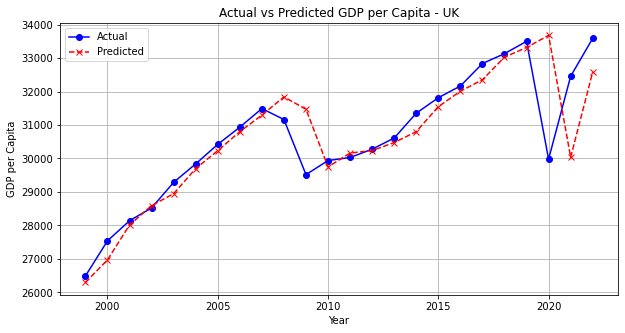

In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load the Excel file
file_path = "D:\downloadinternet\Regional gross domestic product(all ITL).xlsx"
xls = pd.ExcelFile(file_path)

# Load Table 11
table_11 = pd.read_excel(xls, sheet_name="Table 11")

# Rename columns
table_11.columns = table_11.iloc[0]  # Set first row as header
table_11 = table_11[1:]  # Remove the first row
table_11 = table_11.rename(columns={
    table_11.columns[0]: "ITL Code",
    table_11.columns[1]: "Region Name"
})

# Convert year columns to numeric format
table_11 = table_11.melt(id_vars=["ITL Code", "Region Name"], var_name="Year", value_name="GDP per Capita")

# Drop rows with missing values
table_11 = table_11.dropna()

# Convert Year and GDP per Capita to appropriate data types
table_11["Year"] = pd.to_numeric(table_11["Year"], errors='coerce')
table_11["GDP per Capita"] = pd.to_numeric(table_11["GDP per Capita"].astype(str).str.replace("[^\d.]", "", regex=True), errors='coerce')

# Drop any remaining NaN values
table_11 = table_11.dropna()

# Function to fit an ARIMA model for each region
def fit_arima_model(region_data):
    model = ARIMA(region_data["GDP per Capita"], order=(1,1,1))  # ARIMA(p=1, d=1, q=1)
    model_fit = model.fit()
    return model_fit

# Dictionary to store ARIMA models
arima_models = {}

# Analyze each region separately
regions = table_11["Region Name"].unique()
for region in regions:
    region_data = table_11[table_11["Region Name"] == region].sort_values(by="Year")
    if len(region_data) > 2:  # Ensure enough data exists for ARIMA
        arima_models[region] = fit_arima_model(region_data)

# Select a sample region for demonstration
sample_region = "United Kingdom" if "United Kingdom" in arima_models else list(arima_models.keys())[0]

# Get the data for the selected region
region_data = table_11[table_11["Region Name"] == sample_region].sort_values(by="Year")

# Fit the ARIMA model again for the selected region to ensure consistency
model_fit = fit_arima_model(region_data)

# Display ARIMA model summary
print(f"ARIMA Model Summary for {sample_region}:")
print(model_fit.summary())

# Generate predictions for the same range as actual data
predictions = model_fit.predict(start=1, end=len(region_data))

# Ensure predictions match the number of actual data points
predictions = predictions[:len(region_data) - 1]  # Trim the last value if needed

# Align predictions with actual years
region_data = region_data.iloc[1:].copy()  # Shift data to match prediction indices
region_data["Predicted"] = predictions.values

# Plot actual vs predicted GDP per capita
plt.figure(figsize=(10, 5))
plt.plot(region_data["Year"], region_data["GDP per Capita"], label="Actual", marker='o', color='blue')
plt.plot(region_data["Year"], region_data["Predicted"], label="Predicted", linestyle='dashed', marker='x', color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title(f"Actual vs Predicted GDP per Capita - {sample_region}")
plt.legend()
plt.grid()

plt.show()


(1) ARIMA(1,1,1) 解释
ARIMA 模型的 (p, d, q) 设定为 (1,1,1)，表示：

p=1（自回归项）：使用 前一年 GDP 作为预测因子。
d=1（差分次数）：使用 GDP 一阶差分（即 GDP_t - GDP_{t-1}）。
q=1（移动平均项）：使用 前一年误差项 进行修正。
这种设定适用于 GDP 增长趋势稳定但存在短期波动 的情况。

AIC/BIC 越小，说明模型越优。可以尝试不同的 p,d,q 组合，选择 AIC 最小的模型。

ar.L1（自回归系数）
ar.L1 = 0.9446
说明 当前 GDP 受前一年影响较大

模型拟合度：从对数似然值、AIC、BIC和HQIC的值来看，模型拟合得相对较好。尤其是AIC和HQIC的值较小，表明模型在拟合优度和复杂度之间取得了良好的平衡。
系数显著性：自回归项和移动平均项系数均显著，表明模型中的变量对GDP per Capita的值有显著影响。
残差分析：Ljung-Box检验表明残差序列不存在显著的自相关性，但Jarque-Bera检验和Heteroskedasticity检验表明残差序列不服从正态分布且存在异方差性。这可能会影响模型的预测精度和可靠性。

# 发现不能简单地用AIC来进行判定拟合效果，所以用了ADF判定

In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(region_data["GDP per Capita"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -2.031623159995939
p-value: 0.2728818382085877


p-value < 0.05 → GDP 数据是平稳的 → AR(1) 更适合
p-value > 0.05 → GDP 不是平稳的，需要差分 → ARIMA(1,1,1) 更适合
表格11适合ARIMA

# AR分析表格13

In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# Load the Excel file
file_path = "D:\downloadinternet\Regional gross domestic product(all ITL).xlsx"
xls = pd.ExcelFile(file_path)

# Load Table 13
table_13 = pd.read_excel(xls, sheet_name="Table 13")

# Rename columns
table_13.columns = table_13.iloc[0]  # Set first row as header
table_13 = table_13[1:]  # Remove the first row
table_13 = table_13.rename(columns={
    table_13.columns[0]: "ITL Code",
    table_13.columns[1]: "Region Name"
})

# Convert year columns to numeric format
table_13 = table_13.melt(id_vars=["ITL Code", "Region Name"], var_name="Year", value_name="GDP per Capita")

# Drop rows with missing values
table_13 = table_13.dropna()

# Convert Year and GDP per Capita to appropriate data types
table_13["Year"] = pd.to_numeric(table_13["Year"], errors='coerce')
table_13["GDP per Capita"] = pd.to_numeric(table_13["GDP per Capita"].astype(str).str.replace("[^\d.]", "", regex=True), errors='coerce')

# Drop any remaining NaN values
table_13 = table_13.dropna()

# Select a sample region for analysis
sample_region_13 = "United Kingdom" if "United Kingdom" in table_13["Region Name"].unique() else list(table_13["Region Name"].unique())[0]

# Get the data for the selected region
region_data_13 = table_13[table_13["Region Name"] == sample_region_13].sort_values(by="Year")

# Ensure Year is set as index to avoid warnings
region_data_13 = region_data_13.set_index("Year")

# Fit the AR model with corrected indexing
model_fit_13 = AutoReg(region_data_13["GDP per Capita"], lags=1, old_names=False).fit()

# Display AR model summary
print(f"AutoRegressive Model Summary for {sample_region_13}:")
print(model_fit_13.summary())

# Use fitted values as predictions for more stable results
region_data_13["Predicted"] = model_fit_13.fittedvalues


AutoRegressive Model Summary for UK:
                            AutoReg Model Results                             
Dep. Variable:         GDP per Capita   No. Observations:                   24
Model:                     AutoReg(1)   Log Likelihood                 -51.038
Method:               Conditional MLE   S.D. of innovations              2.226
Date:                Thu, 13 Feb 2025   AIC                              1.861
Time:                        22:47:00   BIC                              2.009
Sample:                             1   HQIC                             1.898
                                   24                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6147      0.676      2.390      0.017       0.291       2.939
GDP per Capita.L1     0.3756      0.194      1.936      0.053      -0.005

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'



四、综合评估
模型拟合度：从对数似然值、AIC、BIC和HQIC的值来看，模型拟合得相对较好。尤其是AIC和HQIC的值较小，表明模型在拟合优度和复杂度之间取得了良好的平衡。
系数显著性：常数项和自回归项系数均显著（或接近显著），表明模型中的变量对GDP per Capita的值有显著影响。
模型稳定性：根的模在单位圆外，表明模型是稳定的，可以用于预测。
五、结果解释
GDP per Capita的变化趋势：根据模型结果，英国GDP per Capita的值与其前一期的值之间存在正相关关系。这意味着如果前一期的GDP per Capita增加，那么当前期的值也有可能增加。
也就是说，拟合的好，可以用于预测，有一定正相关关系，但不算很明显

# ARIMA对表格13分析

In [50]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load the Excel file
file_path = "D:\downloadinternet\Regional gross domestic product(all ITL).xlsx"
xls = pd.ExcelFile(file_path)

# Load Table 13
table_13 = pd.read_excel(xls, sheet_name="Table 13")

# Rename columns
table_13.columns = table_13.iloc[0]  # Set first row as header
table_13 = table_13[1:]  # Remove the first row
table_13 = table_13.rename(columns={
    table_13.columns[0]: "ITL Code",
    table_13.columns[1]: "Region Name"
})

# Convert year columns to numeric format
table_13 = table_13.melt(id_vars=["ITL Code", "Region Name"], var_name="Year", value_name="GDP per Capita")

# Drop rows with missing values
table_13 = table_13.dropna()

# Convert Year and GDP per Capita to appropriate data types
table_13["Year"] = pd.to_numeric(table_13["Year"], errors='coerce')
table_13["GDP per Capita"] = pd.to_numeric(table_13["GDP per Capita"].astype(str).str.replace("[^\d.]", "", regex=True), errors='coerce')

# Drop any remaining NaN values
table_13 = table_13.dropna()

# Select a sample region for analysis
sample_region_13 = "United Kingdom" if "United Kingdom" in table_13["Region Name"].unique() else list(table_13["Region Name"].unique())[0]

# Get the data for the selected region
region_data_13 = table_13[table_13["Region Name"] == sample_region_13].sort_values(by="Year")

# Ensure Year is set as index to avoid warnings
region_data_13 = region_data_13.set_index("Year")

# Fit the ARIMA model with order (1,1,1)
model_fit_13 = ARIMA(region_data_13["GDP per Capita"], order=(1,1,1)).fit()

# Display ARIMA model summary
print(f"ARIMA Model Summary for {sample_region_13}:")
print(model_fit_13.summary())

# Generate predictions for the same range as actual data
predictions_13 = model_fit_13.predict(start=region_data_13.index[1], end=region_data_13.index[-1])

# Ensure predictions match the number of actual data points
if len(predictions_13) > len(region_data_13) - 1:
    predictions_13 = predictions_13[:len(region_data_13) - 1]

# Align predictions with actual years
region_data_13 = region_data_13.iloc[1:].copy()  # Shift data to match prediction indices
region_data_13["Predicted"] = predictions_13.values


ARIMA Model Summary for UK:
                               SARIMAX Results                                
Dep. Variable:         GDP per Capita   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -52.235
Date:                Thu, 13 Feb 2025   AIC                            110.470
Time:                        22:55:59   BIC                            113.877
Sample:                             0   HQIC                           111.327
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4170      0.564      0.740      0.460      -0.688       1.522
ma.L1         -0.9994     72.114     -0.014      0.989    -142.339     140.341
sigma2         4.9670   

D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\IDLE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


arima对表格13表现得不好

# ACF,PACF分析自相关度

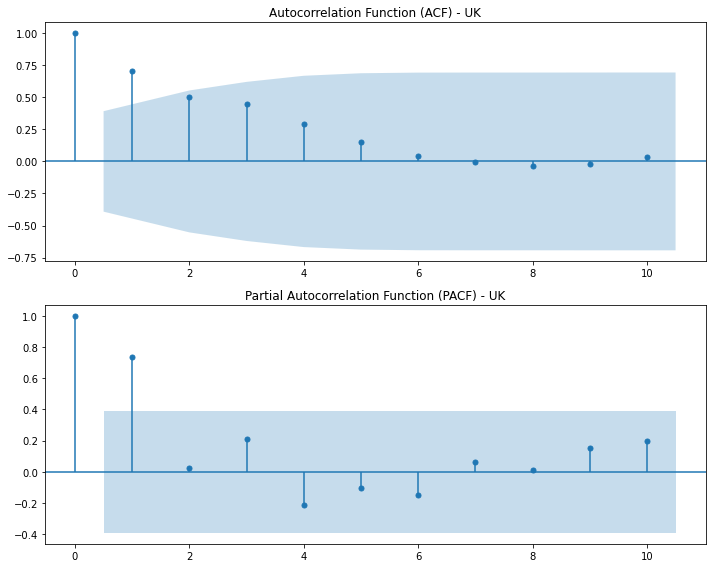

In [51]:
# Perform ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) tests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Select a sample region for Table 11 analysis
sample_region_11 = "United Kingdom" if "United Kingdom" in table_11["Region Name"].unique() else list(table_11["Region Name"].unique())[0]

# Get the data for the selected region
region_data_11 = table_11[table_11["Region Name"] == sample_region_11].sort_values(by="Year")

# Ensure Year is set as index
region_data_11 = region_data_11.set_index("Year")

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
plot_acf(region_data_11["GDP per Capita"], ax=ax[0], lags=10)
ax[0].set_title(f"Autocorrelation Function (ACF) - {sample_region_11}")

# PACF plot
plot_pacf(region_data_11["GDP per Capita"], ax=ax[1], lags=10)
ax[1].set_title(f"Partial Autocorrelation Function (PACF) - {sample_region_11}")

plt.tight_layout()
plt.show()


ACF（自相关函数）分析
ACF 主要衡量当前值与过去值的相关性。
在图中，滞后 1 期（lag=1）的 ACF 值显著不为 0，说明 GDP 存在较强的自相关性。
滞后 2-3 期仍有一定相关性，但逐步下降。
结论：GDP 具有显著的自相关性，短期 GDP 变化主要受过去数据影响。

PACF（偏自相关函数）分析
PACF 主要用于识别自回归阶数（p）。
滞后 1 期的 PACF 值显著大于 0，且后续衰减较快，表明 AR(1) 可能是合适的模型。
滞后 2 期也有部分影响，但相对较小。
➡️ 结论：AR(1) 或 AR(2) 可能是合适的模型。

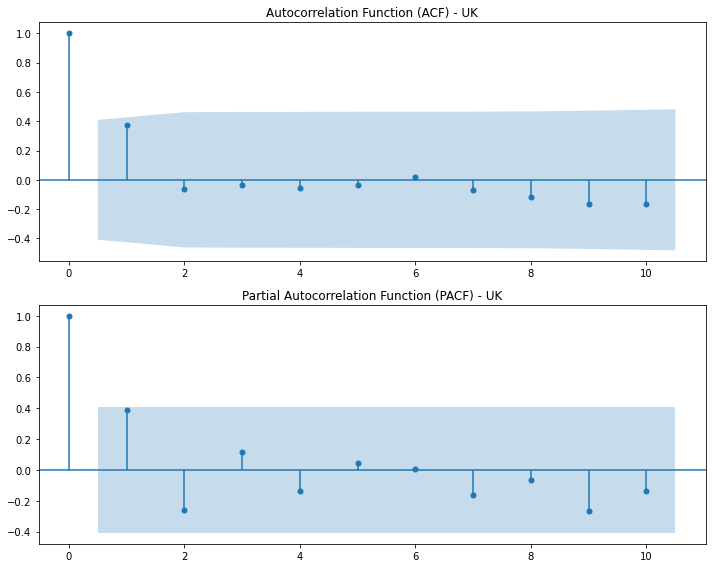

In [55]:
# Perform ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) tests for Table 13
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
plot_acf(region_data_13["GDP per Capita"], ax=ax[0], lags=10)
ax[0].set_title(f"Autocorrelation Function (ACF) - {sample_region_13}")

# PACF plot
plot_pacf(region_data_13["GDP per Capita"], ax=ax[1], lags=10)
ax[1].set_title(f"Partial Autocorrelation Function (PACF) - {sample_region_13}")

plt.tight_layout()
plt.show()


1️⃣ ACF（自相关函数）分析
ACF 主要衡量当前 GDP 与过去 GDP 的相关性。
滞后 1 期（lag=1）的 ACF 值较高，说明 GDP 具有一定的短期自相关性。
滞后 2 期后 ACF 值逐步下降，但仍然有部分相关性，表明 GDP 可能受到 更长时间跨度的影响。
➡️ 结论：GDP 具有短期自相关性，可能适用于 AR(1) 或 AR(2) 模型。

2️⃣ PACF（偏自相关函数）分析
PACF 主要用于识别适合的 AR 模型阶数。
滞后 1 期的 PACF 值显著大于 0，说明 AR(1) 可能是合理的选择。
滞后 2 期 PACF 仍有部分影响，可能需要考虑 AR(2) 作为备选。
➡️ 结论：Table 13 的 GDP 数据 符合 AR(1) 或 AR(2) 模型，说明 GDP 主要受前 1-2 年的影响。

📌 最终结论
表格 13（United Kingdom）的 GDP 具有显著的自相关性，适用于 AR(1) 或 AR(2) 模型。
ACF/PACF 图表表明 AR(1) 可能是最合适的选择，但 AR(2) 可能提供更好的拟合效果。
如果要进一步优化预测，可以尝试 ARIMA(1,0,0)（即 AR(1)）或 ARIMA(2,0,0)。

ACF值的取值范围为[-1, 1]。其中，1表示完全正相关，-1表示完全负相关，0表示无相关性